In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#Initializing values for while loop underneath
y=[]
x=[]
i=0

In [3]:
#Given while loop will not stop looping until we get 100 pairs of y & x
while len(y)<100:
    i=0
    data=np.random.uniform(0,1,(300,2))
    #Run generation of data again and again until we either get all Ns=300 or we fill the needed lists.
    while i<300 and len(y)<100:
        if data[i,0]>data[i,1]**3:
            y.append(data[i,0])
            x.append(data[i,1])
        i+=1
        #If we check all 300 entries and we haven't filled the needed lists then we run the generation again
        #UNTIL condition is met.(Until our lists are filled)

In [4]:
#Creating our wanted data set
z=np.column_stack((y,x))

In [5]:
#Adding noise to our Y column
z[:,0]=z[:,0]+np.random.normal(0,0.1,100)

In [6]:
#Now that we have our wanted Data set I'm going to assign them the first and second column
#to Y and X respectively so its easier on the eyes
Y=z[:,0]
X=z[:,1]

For the optimal MSE for each X we have OptimalMSE=(1+x**3)/2

In [7]:
def optimalMSE(xforfunction):
    return (1+xforfunction**3)/2

In [8]:
YfromoptimalMSElist=[]
for i in range(0,len(X)):
    YfromoptimalMSElist=np.append(YfromoptimalMSElist,optimalMSE(X[i]))

In [9]:
Xbar=np.mean(z[:,1])
Ybar=np.mean(z[:,0])
mean=np.row_stack((Ybar,Xbar))
mean.shape

(2, 1)

In [10]:
SigmaSum=0
i=0
#Finding Σ matrix
for i in range(0,100):
    SigmaSum=SigmaSum+np.dot((mean.T-z[i]).T,(mean.T-z[i]))
Sigma=SigmaSum/100
print(Sigma)

[[0.08278832 0.01836239]
 [0.01836239 0.06253842]]


In [11]:
# Derive the optimum MSE estimate for this case and compute the MSE estimate for each one of the 100 𝑥𝑛 ‘s.  
a=Sigma[0][1]/(math.sqrt(Sigma[0][0])*math.sqrt(Sigma[1][1]))
aforfunction=a*math.sqrt(Sigma[0][0])/math.sqrt(Sigma[1][1])

In [12]:
#creating new Optimal MSE Function given the dataset come from normal distribution
def NormalDistributionOptimal(xforfunction):
    return mean[0]+aforfunction*(xforfunction-mean[1])

In [13]:
#Getting the new OptimalMSEList
optimalMSElistNew=[]
for i in range(0,100):
    optimalMSElistNew=np.append(optimalMSElistNew,NormalDistributionOptimal(X[i]))

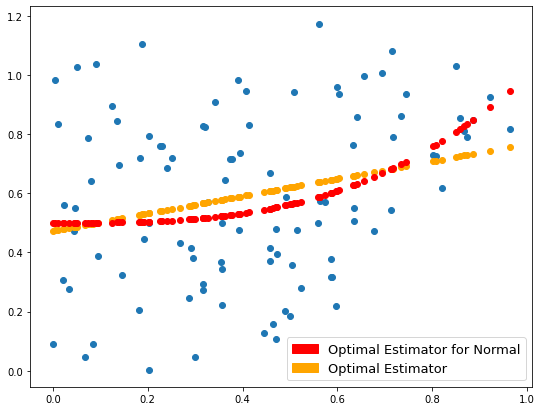

In [14]:
#Plotting the two Functions/OptimalEstimators
plt.figure(figsize=(9,7))
plt.scatter(X,Y)
plt.scatter(X,NormalDistributionOptimal(X),color="orange")
plt.scatter(X,optimalMSE(X),color="r")
Normal_Opt_Est=mpatches.Patch(color="red",label="Optimal Estimator for Normal")
Optimal_Est=mpatches.Patch(color="orange",label="Optimal Estimator")
plt.legend(handles=[Normal_Opt_Est,Optimal_Est],prop={"size":13})
plt.show()

The above graph shows the plots of the two estimators and we see that the optimal estimator for the normal distribution is graphed by a quadratic function and that the other optimal estimator is linear(As expected from the formula).We see that the quadratic function slowly gains ground when it comes to getting closer to the true model's values.Our Optimal Estimator for Normal came from the hypothesis that the datapoints were generated from a normal distribution but they were in fact not generated by such a distribution and it doesn't depict the true model's values as much as the general optimal estimator does.